# Step 1: 데이터 불러오기


In [33]:
import pandas as pd
data_path = 'C:/Code/porto-seguro-safe-driver-prediction/'

train = pd.read_csv(data_path + 'train.csv', index_col='id')
test = pd.read_csv(data_path + 'test.csv', index_col='id')
submission = pd.read_csv(data_path + 'sample_submission.csv',index_col='id')

train.head()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
id,,,,,,,,,,,,,,,,,,,,,
7,0,2,2,5,1,0,0,1,0,0,...,9,1,5,8,0,1,1,0,0,1
9,0,1,1,7,0,0,0,0,1,0,...,3,1,1,9,0,1,1,0,1,0
13,0,5,4,9,1,0,0,0,1,0,...,4,2,7,7,0,1,1,0,1,0
16,0,0,1,2,0,0,1,0,0,0,...,2,2,4,9,0,0,0,0,0,0
17,0,0,2,0,1,0,1,0,0,0,...,3,1,1,3,0,0,0,1,1,0


In [34]:
train.shape, test.shape

((595212, 58), (892816, 57))

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 595212 entries, 7 to 1488027
Data columns (total 58 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   target          595212 non-null  int64  
 1   ps_ind_01       595212 non-null  int64  
 2   ps_ind_02_cat   595212 non-null  int64  
 3   ps_ind_03       595212 non-null  int64  
 4   ps_ind_04_cat   595212 non-null  int64  
 5   ps_ind_05_cat   595212 non-null  int64  
 6   ps_ind_06_bin   595212 non-null  int64  
 7   ps_ind_07_bin   595212 non-null  int64  
 8   ps_ind_08_bin   595212 non-null  int64  
 9   ps_ind_09_bin   595212 non-null  int64  
 10  ps_ind_10_bin   595212 non-null  int64  
 11  ps_ind_11_bin   595212 non-null  int64  
 12  ps_ind_12_bin   595212 non-null  int64  
 13  ps_ind_13_bin   595212 non-null  int64  
 14  ps_ind_14       595212 non-null  int64  
 15  ps_ind_15       595212 non-null  int64  
 16  ps_ind_16_bin   595212 non-null  int64  
 17  ps_ind_17_bin 

<Axes: >

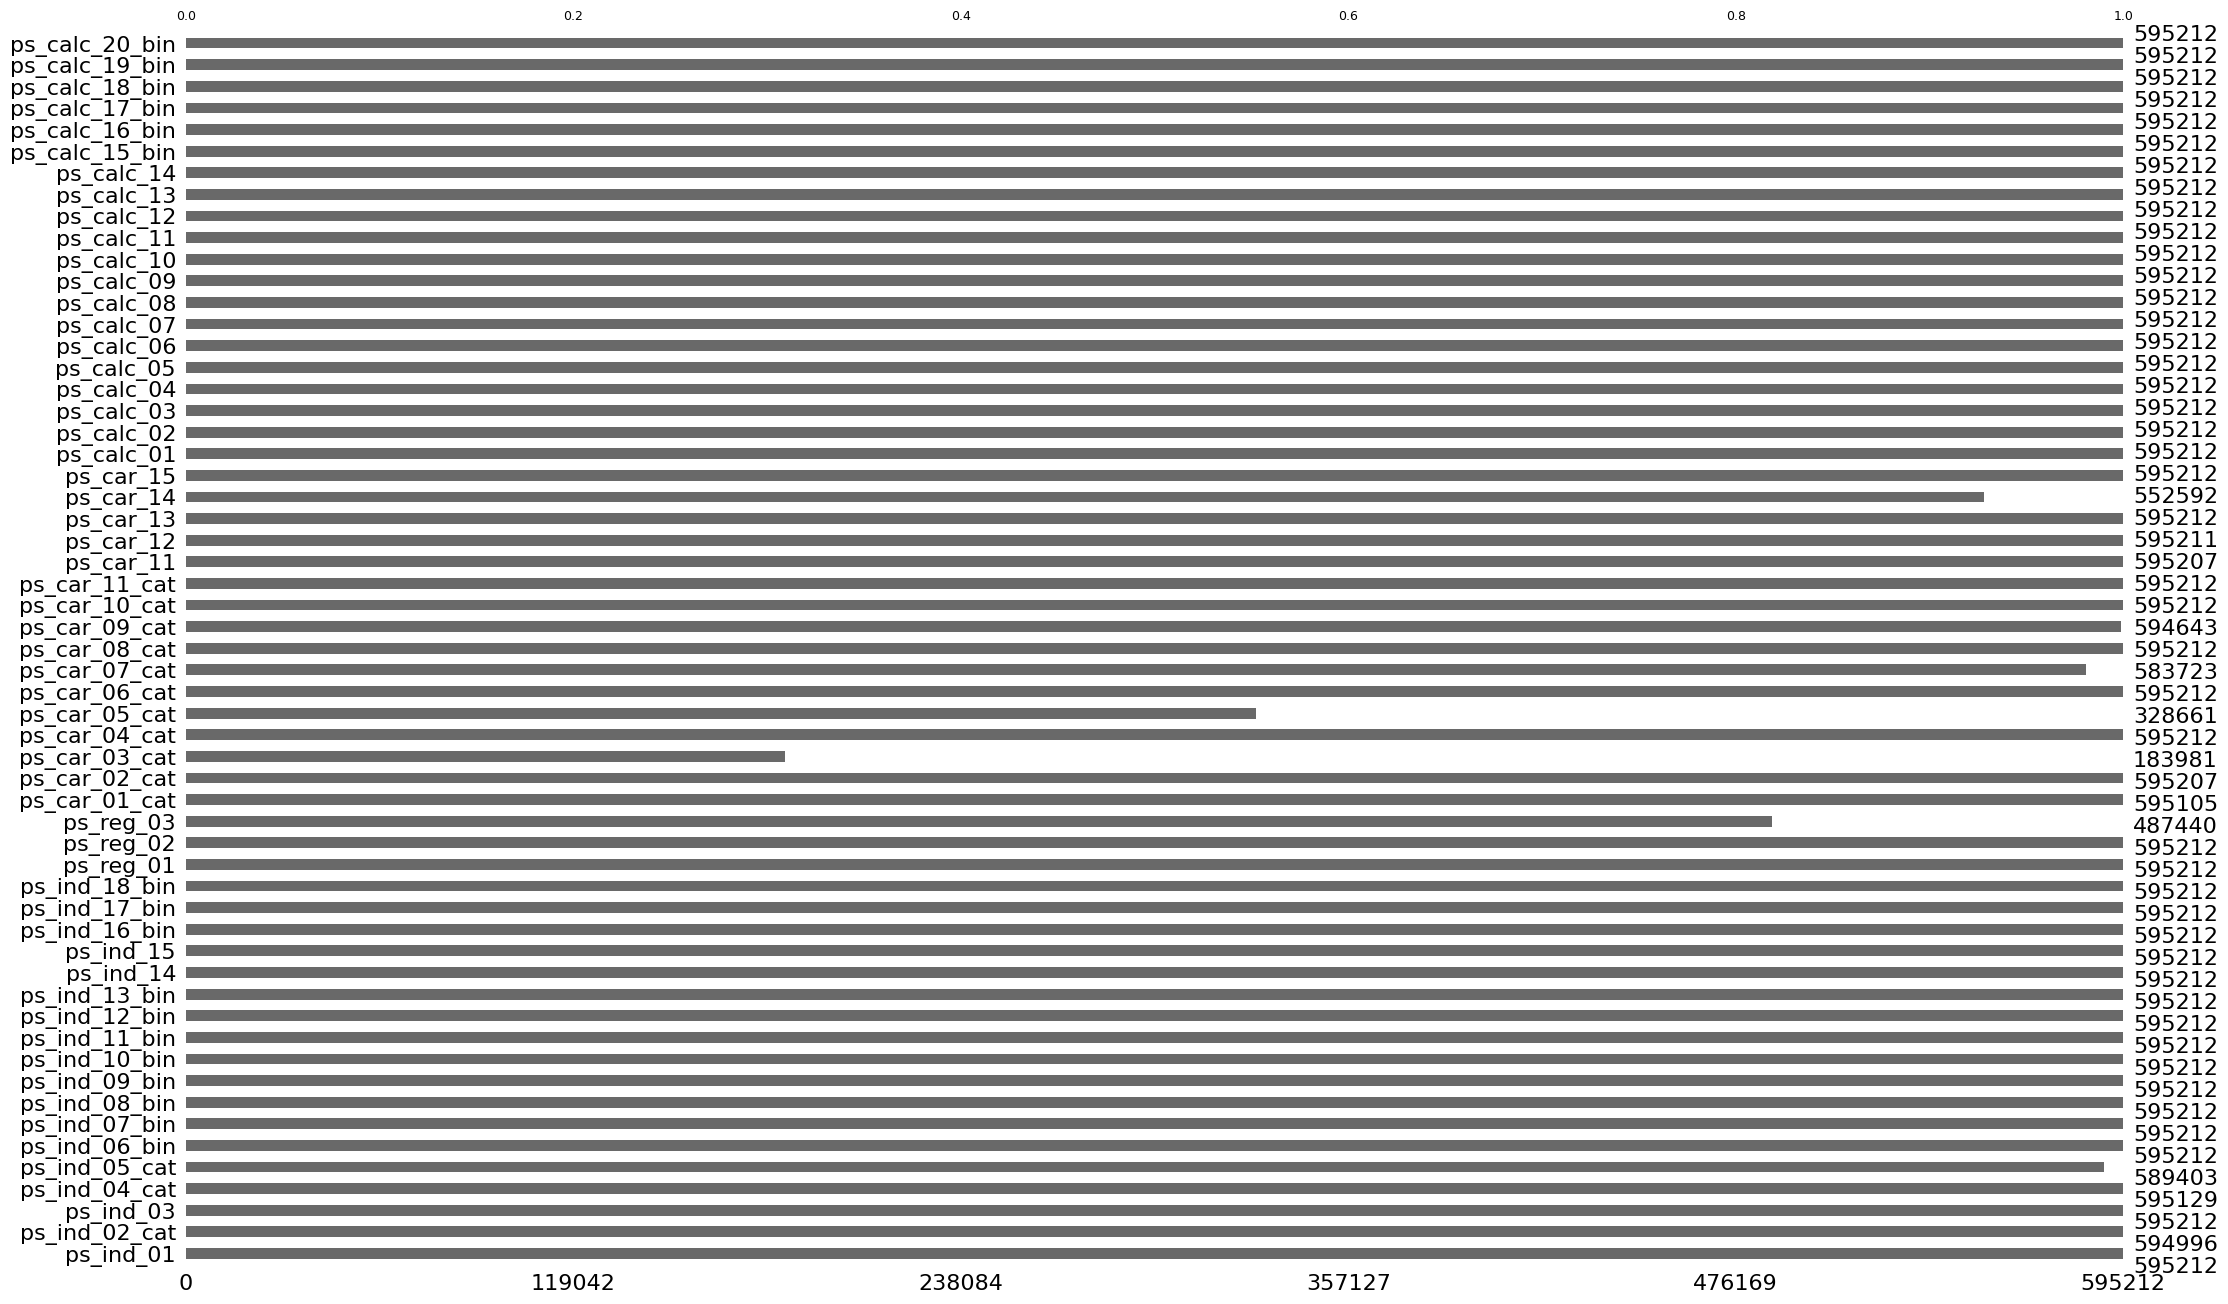

In [36]:
import numpy as np
import missingno as msno

train_copy = train.replace(-1, np.NaN)

train_copy.drop(columns=['target'], inplace=True)
msno.bar(df = train_copy)

In [37]:
def resumetable(df):
    print(f'Data Shape: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary['NULL'] = (df == -1).sum().values
    summary['UNIQUE'] = df.nunique().values
    for col in df.columns:
        if 'bin' in col or 'target' in col:
            summary.loc[col, 'Data type'] = 'binary'
        elif 'cat' in col:
            summary.loc[col, 'Data type'] = 'categorical'
        elif df[col].dtype == float:
            summary.loc[col, 'Data type'] = 'Continuous'
        elif df[col].dtype == int:
            summary.loc[col, 'Data type'] = 'Ordinal'

    return summary

summary = resumetable(train)
summary

Data Shape: (595212, 58)


,dtypes,NULL,UNIQUE,Data type
target,int64,0,2,binary
ps_ind_01,int64,0,8,NaN
ps_ind_02_cat,int64,216,5,categorical
ps_ind_03,int64,0,12,NaN
ps_ind_04_cat,int64,83,3,categorical
ps_ind_05_cat,int64,5809,8,categorical
ps_ind_06_bin,int64,0,2,binary
ps_ind_07_bin,int64,0,2,binary
ps_ind_08_bin,int64,0,2,binary
ps_ind_09_bin,int64,0,2,binary


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline



Text(0.5, 1.0, 'Target Distribution')

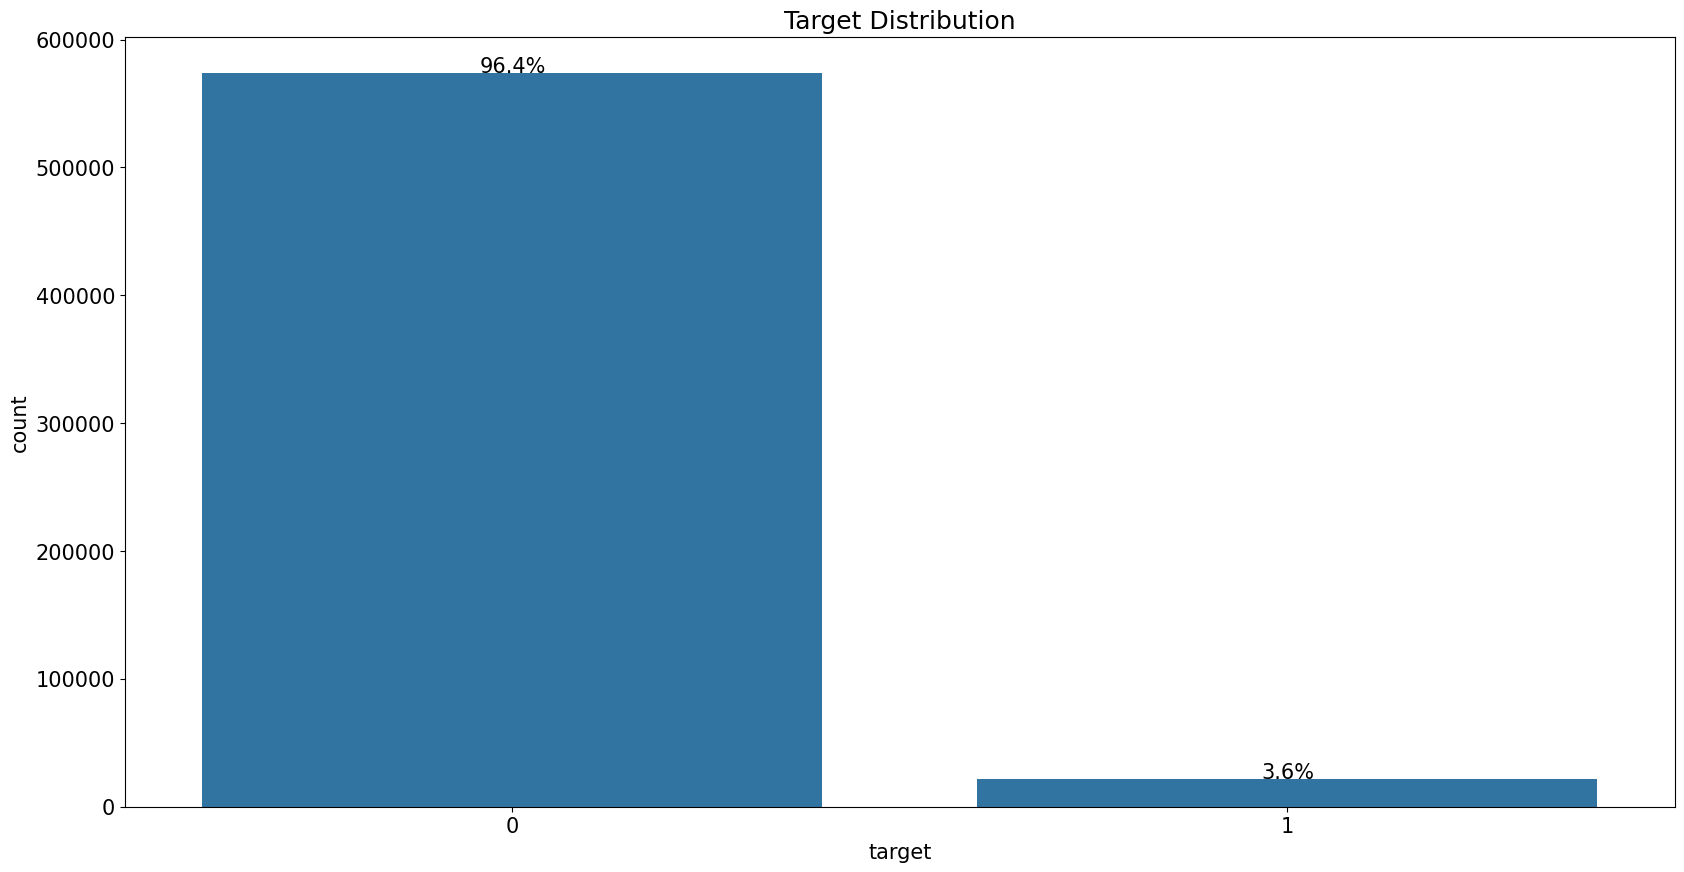

In [39]:
def write_percent(ax, total_size):
    for p in ax.patches:
        #도형 높이
        height = p.get_height()
        #도형 너비
        width = p.get_width()
        #도형 왼쪽 테두리의 x축 위치
        x = p.get_x()
        percent = height/total_size * 100

        ax.text(x+width/2., height + total_size*0.001, f'{percent:.1f}%', ha='center')

mpl.rc('font', size = 15)
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')


In [40]:
import matplotlib.gridspec as gridspec

def plot_target_ratio_by_features(df, features, num_rows, num_cols):
    mpl.rc('font', size = 9)
    plt.figure(figsize=(12, 18))
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(hspace=0.3, wspace=0.3)

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        sns.barplot(x=feature, y='target', data=df, ax=ax)

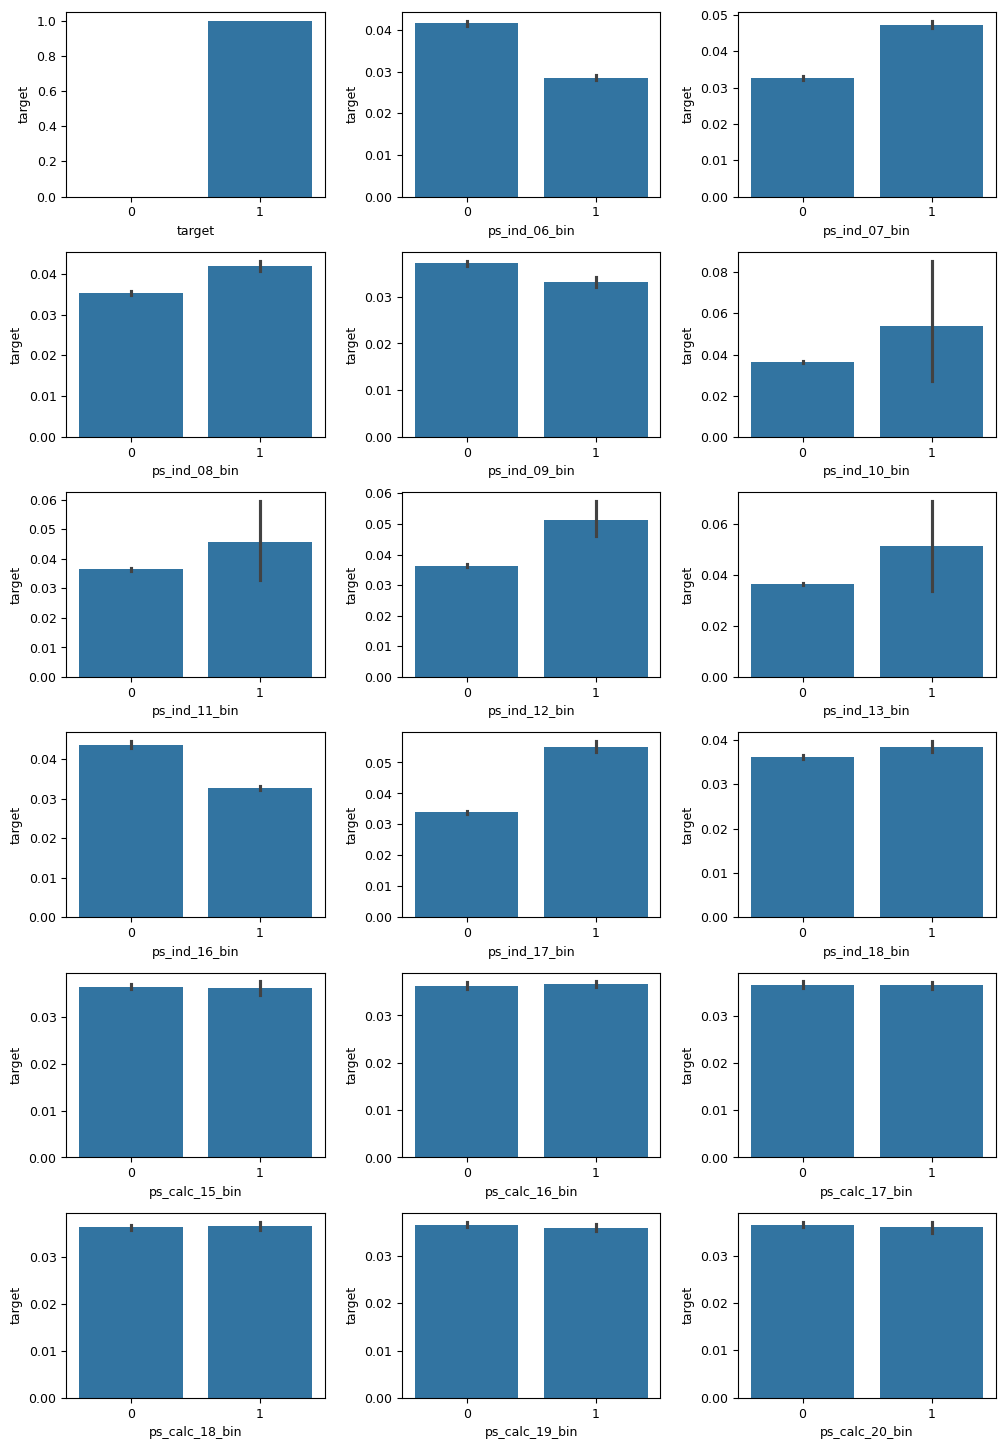

In [41]:
bin_featrues = summary[summary['Data type'] == 'binary'].index

plot_target_ratio_by_features(train, bin_featrues, 6, 3)

KeyboardInterrupt: 

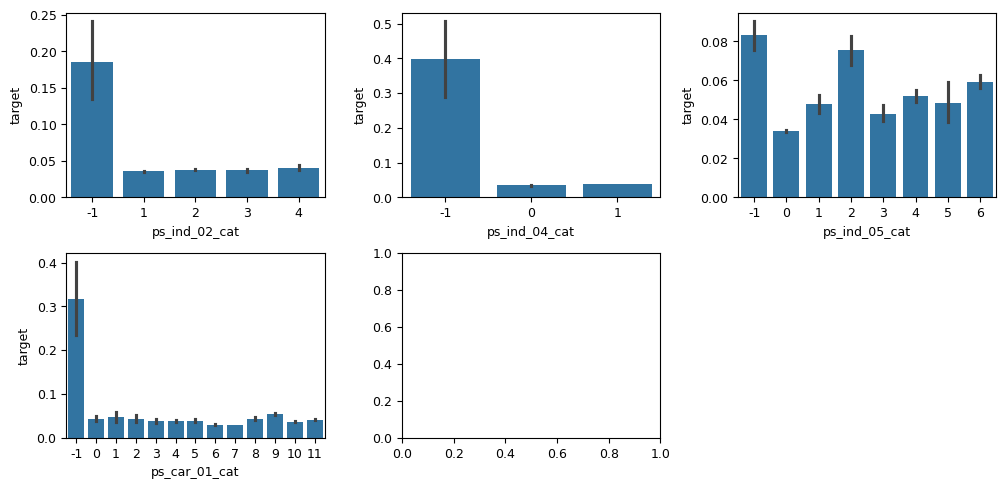

In [42]:
nom_features = summary[summary['Data type'] == 'categorical'].index
plot_target_ratio_by_features(train, nom_features, 6, 3)

In [ ]:
ord_features = summary[summary['Data type'] == 'Ordinal'].index
plot_target_ratio_by_features(train, ord_features, 6, 3)

<Figure size 1200x1800 with 0 Axes>

C:\Users\gogo8\AppData\Local\Temp\ipykernel_29192\1129862763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y = 'target', data = train, palette = 'Set2', ax=ax)
C:\Users\gogo8\AppData\Local\Temp\ipykernel_29192\1129862763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y = 'target', data = train, palette = 'Set2', ax=ax)
C:\Users\gogo8\AppData\Local\Temp\ipykernel_29192\1129862763.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cont_feature, y = 'target', data = train, palette = 'Set2', ax=ax

KeyboardInterrupt: 

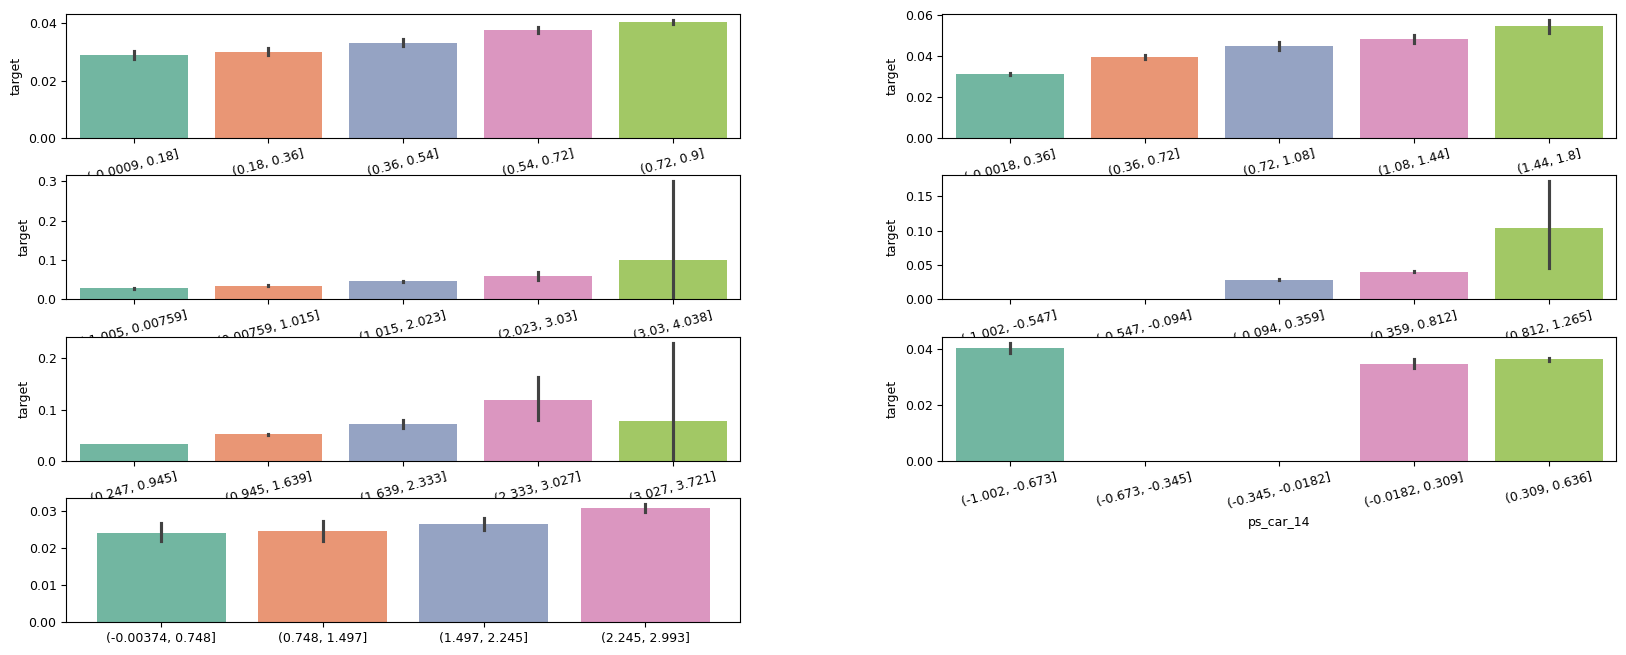

In [43]:
cont_features = summary[summary['Data type'] == 'Continuous'].index

plt.figure(figsize=(20, 10))
grid = gridspec.GridSpec(5, 2)
plt.subplots_adjust(hspace=0.3, wspace=0.3)

for idx, cont_feature in enumerate(cont_features):
    train[cont_feature] = pd.cut(train[cont_feature], 5)

    ax = plt.subplot(grid[idx])
    sns.barplot(x=cont_feature, y = 'target', data = train, palette = 'Set2', ax=ax)
    ax.tick_params(axis='x', labelrotation=15)
